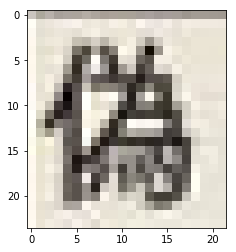

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("/Users/user/Desktop/12moji_ssd512/images/menkyo3.jpg")

# ボックスの左上座標
x1, y1 = 78 , 40

# ボックスの右下座標
x2, y2 = 100 , 64

# 窓画像の幅・高さ



# 入力画像から窓画像を切り取り
trim_img = img[y1:y2, x1:x2]

# 窓画像の保存
np.save("/Users/user/Desktop/triming/trim_menkyo.jpg", trim_img)


plt.imshow(cv2.cvtColor(trim_img, cv2.COLOR_BGR2RGB))
plt.show()  

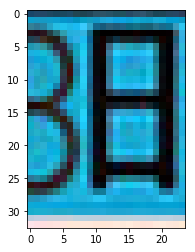

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("/Users/user/Desktop/12moji_ssd512/images/menkyo3.jpg")

# ボックスの左上座標
x1, y1 =  240, 140

# ボックスの右下座標
x2, y2 = 264 , 173

# 窓画像の幅・高さ

#[140:173, 240:264]

# 入力画像から窓画像を切り取り
trim_img = img[y1:y2, x1:x2]

# 窓画像の保存
np.save("/Users/user/Desktop/triming/trim_menkyo.jpg", trim_img)


plt.imshow(cv2.cvtColor(trim_img, cv2.COLOR_BGR2RGB))
plt.show()  

In [ ]:
#  これで切り取りから渡すまでできる！！！

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("/Users/user/Desktop/12moji_ssd512/images/menkyo3.jpg")


# 左上右下をひとまとめにする  [   [x1,y1,x2,y2] , [x1,y1,x2,y2]   ]で一つの画像のボックスを格納している
zahyou_list1 = [  [   [x1,y1,x2,y2] , [x1,y1,x2,y2]   ] , [   [x1,y1,x2,y2] , [x1,y1,x2,y2]   ]   ]


watasu_list = []
for img in img_list:
    #  画像ごとにまとめた座標
    for zahyou_img in zahyou_list1:
        # zahyou = [x1,y1,x2,y2]
        # x1,y1は左上の座標、x2,y2は右上の座標
        for zahyou in zahyou_img:
        
            trim_img = img[zahyou[1]:zahou[3], zahyou[0]:zahyou[2]]
            
            watasu_list.appned(trim_img)
            
# これを文字認識CNNで予測用としてロード            
np.save("/Users/user/Desktop/triming/trim_menkyo", watasu_list)




plt.imshow(cv2.cvtColor(trim_img, cv2.COLOR_BGR2RGB))
plt.show()  

In [1]:
import cv2
import keras
from keras.applications.imagenet_utils import preprocess_input
from keras.backend.tensorflow_backend import set_session
from keras.models import Model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pickle
from random import shuffle
from scipy.misc import imread
from scipy.misc import imresize
import tensorflow as tf
import random

from ssd import SSD300
from ssd_training import MultiboxLoss
from ssd_utils import BBoxUtility


def SSD_predict():

    # いじらない！
    NUM_CLASSES = 21  #もともと4
    input_shape = (300, 300, 3)

    model = SSD300(input_shape, num_classes=NUM_CLASSES)
    model.load_weights('/Users/user/Desktop/ssd_keras-master/checkpoints/weights.29-0.72.hdf5', by_name=True)

    bbox_util = BBoxUtility(NUM_CLASSES)


    inputs = []
    images = []
    img_path = '/Users/user/SSD/train_menkyo_images/menkyosyou.jpg'
    img = image.load_img(img_path, target_size=(300, 300))
    img = image.img_to_array(img)
    images.append(imread(img_path))
    inputs.append(img.copy())
    img_path = '/Users/user/SSD/000001.jpg'
    img = image.load_img(img_path, target_size=(300, 300))
    img = image.img_to_array(img)
    images.append(imread(img_path))
    inputs.append(img.copy())
    img_path =  '/Users/user/SSD/train_menkyo_images/menkyo3.jpg'
    img = image.load_img(img_path, target_size=(300, 300))
    img = image.img_to_array(img)
    images.append(imread(img_path))
    inputs.append(img.copy())
    inputs = preprocess_input(np.array(inputs))
    inputs.shape



    preds = model.predict(inputs, batch_size=1, verbose=1)



    results = bbox_util.detection_out(preds)



    zahyou = []
    image_point = []
    for num, img in enumerate(images):
        # Parse the outputs.
        #  これは予測したもの全てのそれぞれの値が出てしまう！！ラベルである確率が低いものまで全て入ってしまってる
        det_label = results[num][:, 0]
        #  det_confは確率 softmax使ってるから。そのラベルである確率
        det_conf = results[num][:, 1]
        det_xmin = results[num][:, 2]
        det_ymin = results[num][:, 3]
        det_xmax = results[num][:, 4]
        det_ymax = results[num][:, 5]


        # Get detections with confidence higher than 0.6.
        #  確率が６０％以上のものだけのインデックス番号を取り出す
        # →６０％以上の[label, confidence, xmin, ymin, xmax, ymax]＝top_indicesを取り出す
        top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]

        if len(top_indices) <= 50:
            top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.5]


        if len(top_indices) <= 50:
            top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.4]

        if len(top_indices) <= 50:
            top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.3]


        if len(top_indices) <= 50:
            top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.23]

        #if len(top_indices) <= 50:
        #    top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.18]



        top_conf = det_conf[top_indices]
        top_label_indices = det_label[top_indices].tolist()
        top_xmin = det_xmin[top_indices]
        top_ymin = det_ymin[top_indices]
        top_xmax = det_xmax[top_indices]
        top_ymax = det_ymax[top_indices]

        colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

        plt.imshow(img / 255.)
        currentAxis = plt.gca()


        num = []
        for i in range(top_conf.shape[0]):

            xmin = int(round(top_xmin[i] * img.shape[1]))
            ymin = int(round(top_ymin[i] * img.shape[0]))
            # xmax ymaxが右下の座標
            xmax = int(round(top_xmax[i] * img.shape[1]))
            ymax = int(round(top_ymax[i] * img.shape[0]))


            #zahyou.append({'{}枚目'.format(num+1): [(xmin,ymin),(xmax , ymin ) ,(xmin, ymax) ,(xmax ,ymax)] })
            score = top_conf[i]
            label_name = int(top_label_indices[i])
            #label_name = voc_classes[label - 1]
            #  表示する文字→確率とラベルの名前catとか

            display_txt=None

            coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
            zahyou =  [ xmin, ymin,xmax,ymax ]
            color = colors[label_name]
            currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))

            num.append(zahyou)
        image_point.append(num)
    
    

    return images , image_point


Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_size = 200


images,image_point = SSD_predict()


trimming_img = []

for img in images:
    #  画像ごとにまとめた座標
    for img_point in image_point:
        # zahyou = [x1,y1,x2,y2]
        # x1,y1は左上の座標、x2,y2は右上の座標
        for zahyou in img_point:
        
            trim_img = img[zahyou[1]:zahyou[3], zahyou[0]:zahyou[2]]
            
            # なぜか切り取った後にxかyの値が０ものが出てくるので、それは除外
            if trim_img.shape[0] == 0 or trim_img.shape[1] == 0:
                del trim_img
                continue
            
            
            t_img = cv2.resize(trim_img,(image_size, image_size))
            
            threshold=60
            
            gray_img = cv2.cvtColor(t_img, cv2.COLOR_BGR2GRAY)
            ret,g_img = cv2.threshold(gray_img, threshold,255,cv2.THRESH_BINARY)
            kernel = np.ones((3,3),dtype=np.uint8)
            img_d = cv2.erode(g_img,kernel)
            
            
            
            
            #trimming_img.append(t_img)
            #plt.imshow(g_img)

            #plt.show()
            #cv2.imshow('img',img_d)
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()
            
np.save('ssd_trim_img/trim_menkyo.npy',img_d)    

print('OK')
         

/Users/user/FTS/new_ssd_trim_cnn/ssd.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_1", padding="same")`
  name='conv1_1')(net['input'])
/Users/user/FTS/new_ssd_trim_cnn/ssd.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_2", padding="same")`
  name='conv1_2')(net['conv1_1'])
/Users/user/FTS/new_ssd_trim_cnn/ssd.py:48: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), strides=(2, 2), name="pool1", padding="same")`
  name='pool1')(net['conv1_2'])
/Users/user/FTS/new_ssd_trim_cnn/ssd.py:53: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv2_1", padding="same")`
  name='conv2_1')(net['pool1'])
/Users/user/FTS/new_ssd_trim_cnn/ssd.py:57: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv2_2", padding

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


3/3 [==============================] - 5s     


In [ ]:
import numpy as np 
import cv2

img = np.load('/Users/user/Desktop/trim_menkyo.npy')
image = np.array(img)

for img in image:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    